In [84]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import IPython
import sklearn
import seaborn as sns
import scipy as sp

In [85]:
pip install --upgrade sklearn

Requirement already up-to-date: sklearn in /Users/mariaparfenova/opt/anaconda3/lib/python3.8/site-packages (0.0)
Note: you may need to restart the kernel to use updated packages.


In [86]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [87]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

#### Dropping rows with null values

In [88]:
df = df.dropna()
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
6055,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,...,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,No
6056,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,...,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,No
6057,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,...,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,No,No
6058,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,...,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No,No
6059,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,NE,41.0,NNE,...,61.0,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,No,No


In [89]:
print("Keys of weather set: \n{}".format(df.keys()))

Keys of weather set: 
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


#### Features correlation heatmap

#### Create an 'X' matrix by dropping the irrelevant columns.

I am separating dataframe into X and y and dropping unecessary columns as well as dropping the 'Rain Tomorrow' column. 
I am putting 'RainTomorrow' as the target value, and the rest of the features are in X.

In [90]:
X = df.drop(['WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindGustDir', 'WindGustSpeed', 
             'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'RainTomorrow', 
             'RainToday', 'Location', 'Date'], axis=1)
y = df.RainTomorrow

#### Data Preprocessing

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))

X_train shape: (45136, 10)
y_train shape: (45136,)
X_test shape: (11284, 10)
y_test shape: (11284,)


#### Printing the Pipeline Score - results from StandardScaler and Logistic Regression

In [71]:
pipe.score(X_test, y_test)

0.8380007089684509

In [72]:
std=StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)

In [73]:
print(std.mean_)

[13.43050337 24.19219027  2.13773928  5.49694257  7.74072138 65.90845445
 49.61243797  4.32707816 18.17182958 22.6822204 ]


#### Implementing KNN algorithm

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.predict(X_test)
score = knn.score(X_test, y_test)
print(score)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.8292272243885147
[[8395  414]
 [1286 1189]]
              precision    recall  f1-score   support

          No       0.87      0.95      0.91      8809
         Yes       0.74      0.48      0.58      2475

    accuracy                           0.85     11284
   macro avg       0.80      0.72      0.75     11284
weighted avg       0.84      0.85      0.84     11284

0.8493442041829139


#### Implementing Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scoreTest = clf.score(X_test, y_test)
print(scoreTest)

0.8282523927685218


In [79]:
predictions = clf.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[8190  619]
 [1319 1156]]
              precision    recall  f1-score   support

          No       0.86      0.93      0.89      8809
         Yes       0.65      0.47      0.54      2475

    accuracy                           0.83     11284
   macro avg       0.76      0.70      0.72     11284
weighted avg       0.82      0.83      0.82     11284

0.8282523927685218


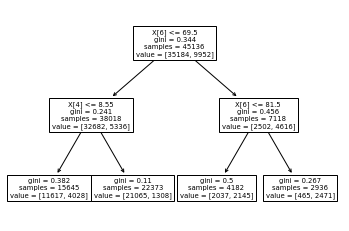

In [80]:
tree.plot_tree(clf)
plt.show()

#### Implementing Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[8395  414]
 [1286 1189]]
              precision    recall  f1-score   support

          No       0.87      0.95      0.91      8809
         Yes       0.74      0.48      0.58      2475

    accuracy                           0.85     11284
   macro avg       0.80      0.72      0.75     11284
weighted avg       0.84      0.85      0.84     11284

0.8493442041829139
